In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

/Users/lavu/Documents/github/ML_Projects/MachineLearning/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 16.0k/16.0k [00:00<00:00, 19.3MB/s]

Extracting files...
Path to dataset files: /Users/lavu/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,mean_absolute_error,mean_squared_error,f1_score,r2_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [8]:
df= pd.read_csv("data/insurance.csv")
print(df.head())
print(df.info())
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [10]:
df["high_cost"] = (df["charges"] > df["charges"].median()).astype(int)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [12]:
X_reg= df.drop(columns=["charges","high_cost"])
y_reg= df["charges"]

X_clf= df.drop(columns=["charges","high_cost"])
y_clf= df["high_cost"]

scaler= StandardScaler()
X_reg_scaled= scaler.fit_transform(X_reg)


In [13]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)


In [14]:
reg_model= RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg= reg_model.predict(X_test_reg)

In [15]:
print("Regression Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))      


Regression Model Performance:
Mean Absolute Error: 2545.622521021584
Mean Squared Error: 20867794.91145395
R^2 Score: 0.865584763811357


In [16]:
X_clf_scaled= scaler.fit_transform(X_clf)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_scaled, y_clf, test_size=0.2, random_state=42
)

In [17]:
clf_model=RandomForestClassifier(n_estimators=150,random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf= clf_model.predict(X_test_clf)

In [18]:
print("\n============== CLASSIFICATION RESULTS ==============")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("F1 Score:", f1_score(y_test_clf, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))


============== CLASSIFICATION RESULTS ==============
Accuracy: 0.9328358208955224
F1 Score: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       146
           1       0.94      0.91      0.93       122

    accuracy                           0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268



In [19]:
test_sample = X_test_reg[0].reshape(1, -1)
print("Predicted:", reg_model.predict(test_sample)[0])
print("Actual:", y_test_reg.iloc[0])


Predicted: 9630.262601399998
Actual: 9095.06825


In [27]:
test_sample = X_test_clf[14].reshape(1, -1)
print("Predicted class:", clf_model.predict(test_sample)[0])
print("Actual class:", y_test_clf.iloc[0])


Predicted class: 1
Actual class: 0


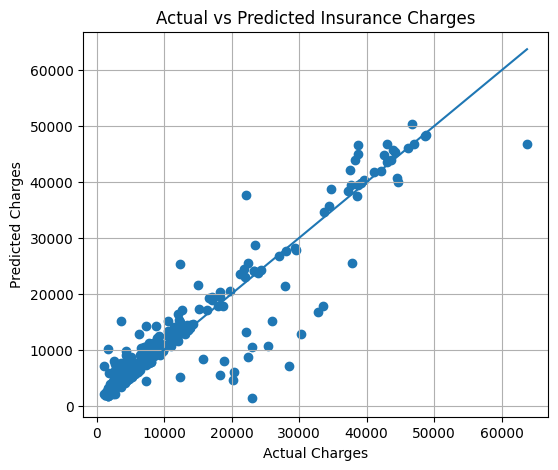

In [28]:
actual= y_test_reg.values
predicted= y_pred_reg

plt.figure(figsize=(6, 5))
plt.scatter(actual, predicted)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()])
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.grid(True)
plt.show()

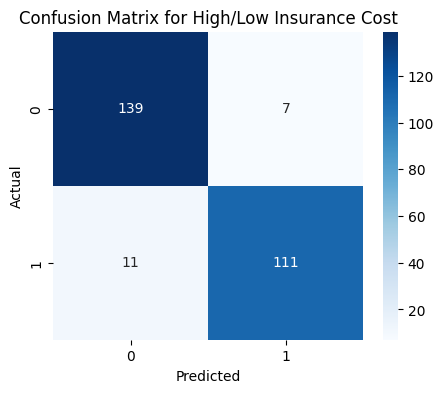

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# sample classification outputs (0 = low cost, 1 = high cost)
y_true = y_test_clf
y_pred = y_pred_clf

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for High/Low Insurance Cost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
